In [1]:
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
os.getcwd()

'/Users/kivan/repos/python-novice-gapminder/dssg-notebooks'

In [3]:
time.strftime("last updated: %a, %d %b %Y %H:%M", time.localtime())

'last updated: Thu, 14 Jul 2016 13:49'

# Plotting

* Using matplotlib we can plot lists of numbers

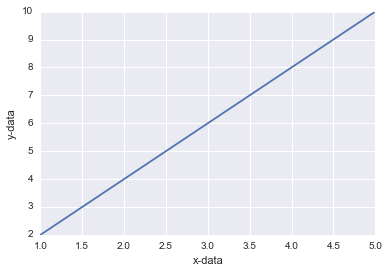

In [4]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.xlabel('x-data')
plt.ylabel('y-data')

* We can also plot Pandas dataframes
* Plot Australia data using dataframe plot method
* Access row, Series.plot plots with columns as x variable
* Note that dataframe is implicitly using matplotlib

In [5]:
oceania_df = pd.read_csv("../data/gapminder_gdp_oceania.csv", index_col="country")

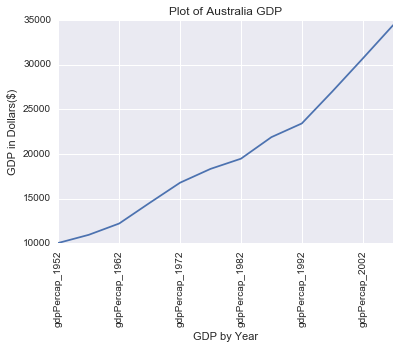

In [6]:
oceania_df.ix["Australia"].plot()
plt.xlabel('GDP by Year')
plt.ylabel('GDP in Dollars($)')
plt.title('Plot of Australia GDP')
plt.xticks(rotation=90)
plt.savefig('AustraliaGDP.png')

* Plot both series
* By default, DataFrame.plot plots with the indexes (or rows) as the x axis
* We can transpose to get what we need in order to plot multiple series

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.]),
 <a list of 7 Text xticklabel objects>)

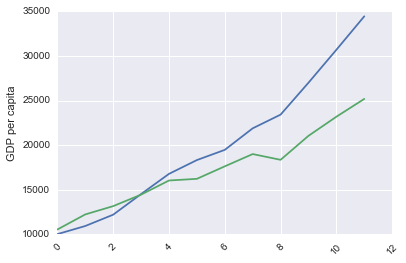

In [7]:
plt.plot(oceania_df.T.values)
plt.ylabel("GDP per capita")
plt.xticks(rotation=45)

* Do a bar plot, use fancier style

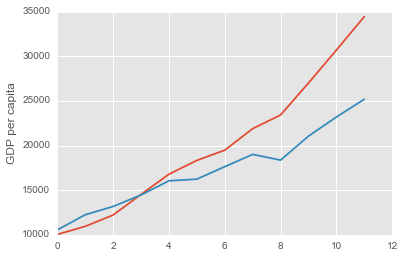

In [8]:
plt.style.use("ggplot")
plt.plot(oceania_df.T.values)
plt.xticks(rotation=0)
plt.ylabel("GDP per capita")

In [9]:
oceania_df.columns

Index([u'gdpPercap_1952', u'gdpPercap_1957', u'gdpPercap_1962',
       u'gdpPercap_1967', u'gdpPercap_1972', u'gdpPercap_1977',
       u'gdpPercap_1982', u'gdpPercap_1987', u'gdpPercap_1992',
       u'gdpPercap_1997', u'gdpPercap_2002', u'gdpPercap_2007'],
      dtype='object')

In [10]:
oceania_df.columns[0][-4:]

'1952'

* Use pyplot.plot explicitly
* Store years in a list
* We can also convert dataframe data to a list (though this is not necessary)

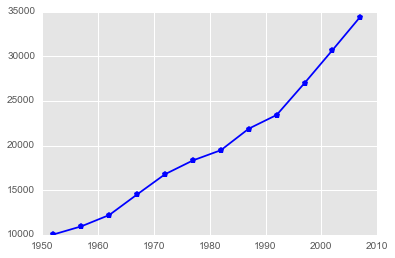

In [11]:
years = []
for col in oceania_df.columns:
    # year is given by last 4 chars in col
    year = col[-4:]
    years.append(year)

gdp_australia = oceania_df.ix["Australia"].tolist()
plt.plot(years, gdp_australia, 'pb-')

In [12]:
years

['1952',
 '1957',
 '1962',
 '1967',
 '1972',
 '1977',
 '1982',
 '1987',
 '1992',
 '1997',
 '2002',
 '2007']

* Plot two series with labels

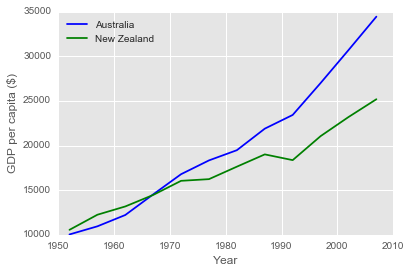

In [13]:
years = []
for col in oceania_df.columns:
    # year is given by last 4 chars in col
    year = col[-4:]
    years.append(year)

gdp_australia = oceania_df.ix["Australia"]
gdp_nz = oceania_df.ix["New Zealand"]

plt.plot(years, gdp_australia, 'b-', label="Australia")
plt.plot(years, gdp_nz, 'g-', label="New Zealand")
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("GDP per capita ($)")

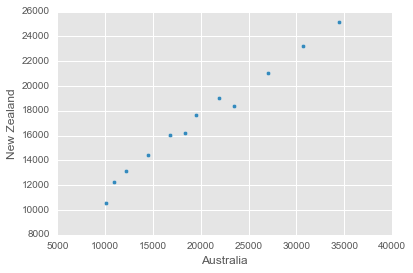

In [14]:
# alternative scatter plot
#plt.scatter(gdp_australia, gdp_nz)
oceania_df.T.plot.scatter(x = "Australia", y = "New Zealand")

## Minima and maxima

* Modify the example in the notes to plot the minimum GDP per capita over time for all the countries in Asia. Modify it again to plot the maximum GDP per capita over time for Asia

In [15]:
asia_df = pd.read_csv("../data/gapminder_gdp_asia.csv", index_col="country")

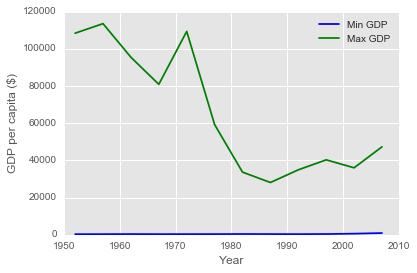

In [16]:
years = []
for col in asia_df.columns:
    # year is given by last 4 chars in col
    year = col[-4:]
    years.append(year)

asia_min = asia_df.min().tolist()
asia_max = asia_df.max().tolist()

plt.plot(years, asia_min, 'b-', label="Min GDP")
plt.plot(years, asia_max, 'g-', label="Max GDP")
plt.legend(loc="upper right")
plt.xlabel("Year")
plt.ylabel("GDP per capita ($)")

## Correlations

* Modify the example in the notes to create a scatter plot showing the relationship between the minimum and maximum GDP per capita among the countries in Asia for each year in the data set. What relationship do you see (if any)?

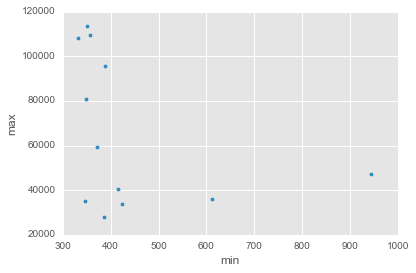

In [17]:
asia_df.describe().T.plot(kind='scatter', x = 'min', y = 'max')

* You might note that the variability in the maximum is much higher than that of the minimum. Take a look at the maximum and the max indexes:

gdpPercap_1952          Kuwait
gdpPercap_1957          Kuwait
gdpPercap_1962          Kuwait
gdpPercap_1967          Kuwait
gdpPercap_1972          Kuwait
gdpPercap_1977          Kuwait
gdpPercap_1982    Saudi Arabia
gdpPercap_1987          Kuwait
gdpPercap_1992          Kuwait
gdpPercap_1997          Kuwait
gdpPercap_2002       Singapore
gdpPercap_2007          Kuwait
dtype: object

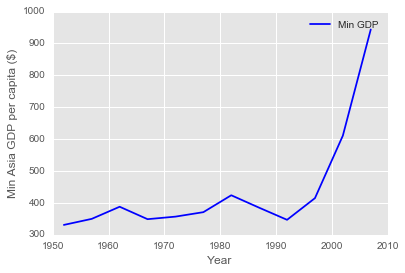

In [18]:
years = []
for col in asia_df.columns:
    # year is given by last 4 chars in col
    year = col[-4:]
    years.append(year)

asia_min = asia_df.min().tolist()
plt.plot(years, asia_min, 'b-', label="Min GDP")
plt.legend(loc="upper right")
plt.xlabel("Year")
plt.ylabel("Min Asia GDP per capita ($)")
asia_df.idxmax()

## More correlations

gdpPercap_1952    Myanmar
gdpPercap_1957    Myanmar
gdpPercap_1962    Myanmar
gdpPercap_1967    Myanmar
gdpPercap_1972    Myanmar
gdpPercap_1977    Myanmar
gdpPercap_1982    Myanmar
gdpPercap_1987    Myanmar
gdpPercap_1992    Myanmar
gdpPercap_1997    Myanmar
gdpPercap_2002    Myanmar
gdpPercap_2007    Myanmar
dtype: object

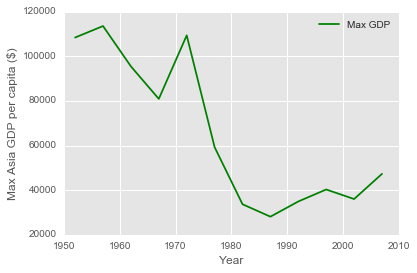

In [19]:
years = []
for col in asia_df.columns:
    # year is given by last 4 chars in col
    year = col[-4:]
    years.append(year)

asia_max = asia_df.max().tolist()
plt.plot(years, asia_max, 'g-', label="Max GDP")
plt.legend(loc="upper right")
plt.xlabel("Year")
plt.ylabel("Max Asia GDP per capita ($)")
asia_df.idxmin()

* As a final exercise, make a fancy plot that shows the correlation between GDP and life expectancy for 2007, normalizing marker size by population.

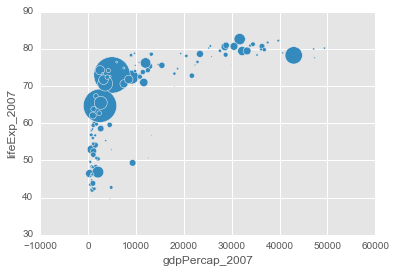

In [20]:
all_df = pd.read_csv("../data/gapminder_all.csv", index_col="country")
all_df.plot(kind='scatter', x = 'gdpPercap_2007', y='lifeExp_2007',
            s = all_df['pop_2007']/1e6)

In [21]:
all_df.head()

,continent,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
country,,,,,,,,,,,,,,,,,,,,,
Algeria,Africa,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,5023.216647,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
Angola,Africa,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,2627.845685,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
Benin,Africa,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,1191.207681,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
Botswana,Africa,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,7954.111645,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
Burkina Faso,Africa,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,931.752773,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


* make a plot that labels the previous plot with country name

In [22]:
europe_df = all_df.loc[all_df["continent"]=="Europe"]

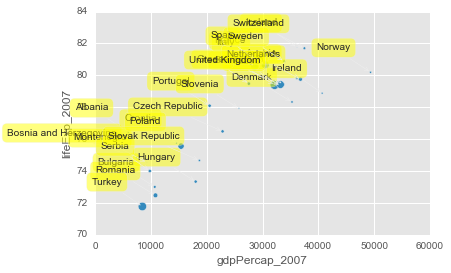

In [23]:
europe_df.plot(kind='scatter', x = 'gdpPercap_2007', y='lifeExp_2007',
            s = europe_df['pop_2007']/1e6)
for label, x, y in zip(europe_df.index,europe_df['gdpPercap_2007'], europe_df['lifeExp_2007']):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
    )
plt.show()

from: http://stackoverflow.com/questions/5147112/matplotlib-how-to-put-individual-tags-for-a-scatter-plot